Using TensorFlow backend.


Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 1s 98us/step - loss: 0.1591 - acc: 0.7975 - val_loss: 0.1101 - val_acc: 0.8737
Epoch 2/20
15000/15000 [==============================] - 1s 60us/step - loss: 0.0814 - acc: 0.9094 - val_loss: 0.0952 - val_acc: 0.8698
Epoch 3/20
15000/15000 [==============================] - 1s 61us/step - loss: 0.0564 - acc: 0.9349 - val_loss: 0.0878 - val_acc: 0.8813
Epoch 4/20
15000/15000 [==============================] - 1s 61us/step - loss: 0.0415 - acc: 0.9520 - val_loss: 0.0827 - val_acc: 0.8867
Epoch 5/20
15000/15000 [==============================] - 1s 60us/step - loss: 0.0317 - acc: 0.9630 - val_loss: 0.0939 - val_acc: 0.8718
Epoch 6/20
15000/15000 [==============================] - 1s 61us/step - loss: 0.0245 - acc: 0.9729 - val_loss: 0.0970 - val_acc: 0.8750
Epoch 7/20
15000/15000 [==============================] - 1s 60us/step - loss: 0.0194 - acc: 0.9795 - val_loss: 0.0988 - val_acc

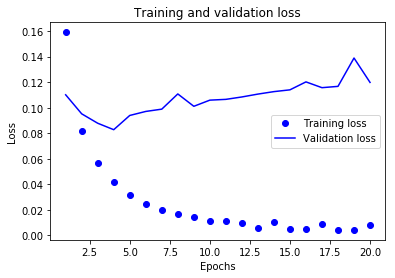

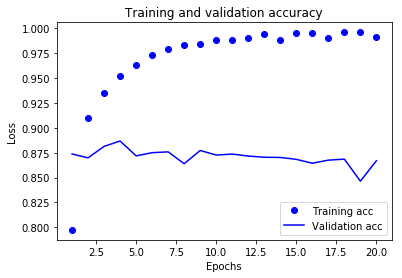

25000/25000 [==============================] - 1s 57us/step
[0.13356221847765148, 0.8505600094795227]


In [1]:
#Classifying movie reviews: Binary Classification
#Using mse as loss function and tanh as activation function

from keras.datasets import imdb
from keras import models
from keras import layers
from keras import optimizers
import matplotlib.pyplot as plt
import numpy as np

(train_data,train_labels), (test_data,test_labels) = imdb.load_data(num_words=10000)


"""Encoding the integer sequences into a binary matrix"""
def vectorize_sequences(sequences,dimension=10000):
    results = np.zeros((len(sequences),dimension))
    for i, sequence in enumerate(sequences):
        results[i,sequence]=1
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')


"""Model definition"""
model = models.Sequential()
model.add(layers.Dense(16,activation='tanh',input_shape=(10000,)))
model.add(layers.Dense(16,activation='tanh'))
model.add(layers.Dense(1,activation='sigmoid'))


"""Setting aside a validation set"""
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]


"""Compiling and training the model"""
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='mse',metrics=['acc'])

history = model.fit(partial_x_train,partial_y_train,epochs=20,
                    batch_size=512,
                    validation_data=(x_val,y_val))

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['acc']

epochs = range(1,len(acc)+1)


"""Plotting the training and validation loss"""
plt.plot(epochs,loss_values,'bo',label='Training loss')
plt.plot(epochs,val_loss_values,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


"""Plotting the training and validation accuracy"""
plt.clf()
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

results = model.evaluate(x_test,y_test)
print(results)